<b style="font-size:150%;"> This script makes a statistical analysis of the hard drive disks data. <br>
</b> 

In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import ticker
import seaborn
%matplotlib inline

In [2]:
## matplotlib settings
matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize']=16,10
plt.rcParams.update({'font.size': 12, 
                            'font.family': 'STIXGeneral', 
                            'mathtext.fontset': 'stix'})

In [3]:
# seaborn settings
seaborn.set_palette('deep', desat=.6)

In [4]:
# reading data set
data= pd.read_csv('hard_drive_data_2015.csv')
data= data.drop('Unnamed: 0', 1)

<p style= "font-size: 120%;">
Failed disks:
</p>


In [5]:
fail= pd.DataFrame(data[data.failure==1]).reset_index()
fail= fail.drop('index', 1)

<p style= "font-size: 120%;">
Success disks:
</p>



In [6]:
success= data.groupby(['serial_number']).filter(lambda x: x['failure'].sum()==0) 
succ= pd.DataFrame(success.groupby(['serial_number']).tail(n=1)).reset_index()
succ= succ.drop('index', 1)

In [7]:
def cohen_distance(dist1, dist2):
    diff= abs(dist1.mean() - dist2.mean() )
    n1, n2= len(dist1), len(dist2)
    var1, var2= dist1.var(), dist2.var()
    denominator= ((n1-1)*var1 + (n2-1)*var2)/ (n1+n2)
    d= diff/np.sqrt(denominator)
    return d

In [8]:
def subsampling(big_dataframe, nelements=10):
    '''This function makes subsamples of the success disks without replacement'''
    subsample= big_dataframe.sample(n= nelements, 
                                     replace=False)
    sub_sample= pd.DataFrame(subsample).reset_index()
    sub_sample= sub_sample.drop('index', 1)
    return sub_sample

In [9]:
def distr_from_subsample(sub_sample):
    return sub_sample.smart_194_raw

<b style= "font-size: 120%;">
Analysis of the data
</b>

<p style= "font-size: 100%;">
1. Obtain distributions of one S.M.A.R.T attribute for failed and success disks. <br>
In this case is the temperature
</p>

In [10]:
Temp1, Temp2= fail.smart_194_raw, succ.smart_194_raw

<p style= "font-size: 100%;">
2. I want to see how different are these distributions; therefore, <br>
I compute the Cohen's distance d. It turns out that d is different to zero, <br>
which means that these distributions are not so different (see bellow).
</p>

In [11]:
d_observed= cohen_distance(Temp1, Temp2)
d_observed

0.052604352402707798

In [12]:
# cohen's d with a sub_sample of succ disks 
d= cohen_distance(Temp1, distr_from_subsample(subsampling(succ, nelements=len(fail))))
d

0.074603915135566579

<p style= "font-size: 100%;">
3. I postulate my null hypothesis $H_0$: The distributions are different. <br>
Procedure: <br>
- I create 1000 sub-samples from the sucess disks. Each of these samples has the same number 
of elements as the sample of failed disks. <br> 
- I compute the sampling distribution of the Cohen's distance d by calculating the difference between the distrbution of failed disks and each of the 1000 sub-samples of sucess disks. 
</p>

In [13]:
iters= 1000
n= len(fail)
sampling_d= [cohen_distance(Temp1, distr_from_subsample(subsampling(succ, nelements= n))) for i in range(iters)]

<p style= "font-size: 100%;">
4. Computation of the p-value: <br>
What is the probability that the Cohen's distance d is larger or equal than d_observed?
</p>

In [14]:
p_value= sum(sampling_d>=d_observed)/len(sampling_d)
p_value

0.495

<p style= "font-size: 100%;">
Here's a plot of the sampling distribution of the Cohen's distance d. The vertical gray line is d_observed.  
</p>

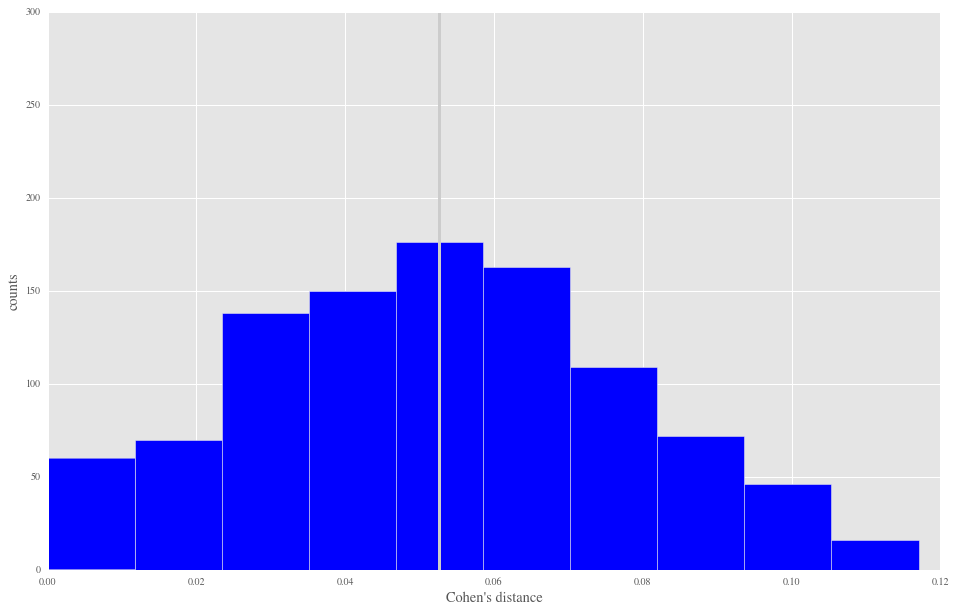

In [15]:
plt.vlines(d_observed, 0, 300, linewidth=3, color='0.8')
plt.hist(sampling_d, color= 'blue')
plt.xlabel(r"Cohen's distance")
plt.ylabel('counts')

<p style= "font-size: 100%;">
Given that p-value is 47%, I can not reject $H_0$.   
</p>